In [ ]:
import cv2
import argparse
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
path = '/content/drive/MyDrive/Github/image/'

images = []
for i in range(1, 6):
  images.append(cv2.imread(path + f'image{i}.jpg'))

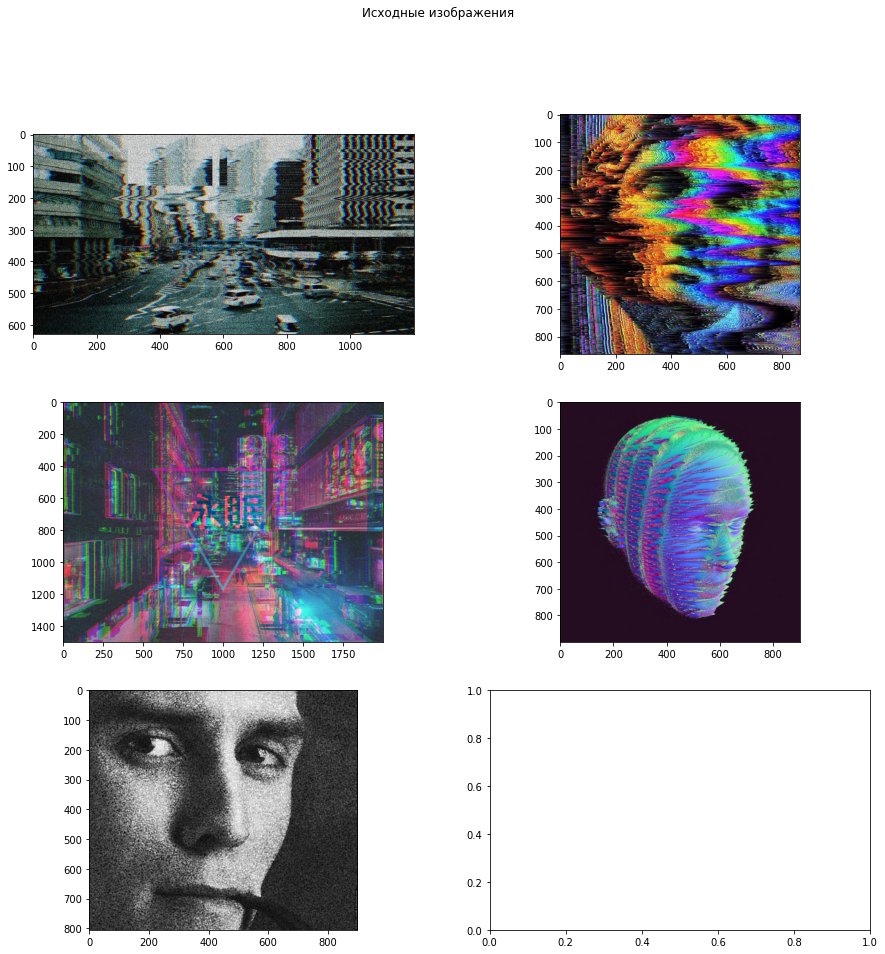

In [ ]:
fig, axs = plt.subplots(nrows= 3 , ncols= 2 , figsize=(15, 15))

fig.suptitle('Исходные изображения')

axs[0, 0].imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))
axs[0, 1].imshow(cv2.cvtColor(images[1],cv2.COLOR_BGR2RGB))
axs[1, 0].imshow(cv2.cvtColor(images[2],cv2.COLOR_BGR2RGB))
axs[1, 1].imshow(cv2.cvtColor(images[3],cv2.COLOR_BGR2RGB))
axs[2, 0].imshow(cv2.cvtColor(images[4],cv2.COLOR_BGR2RGB))

True

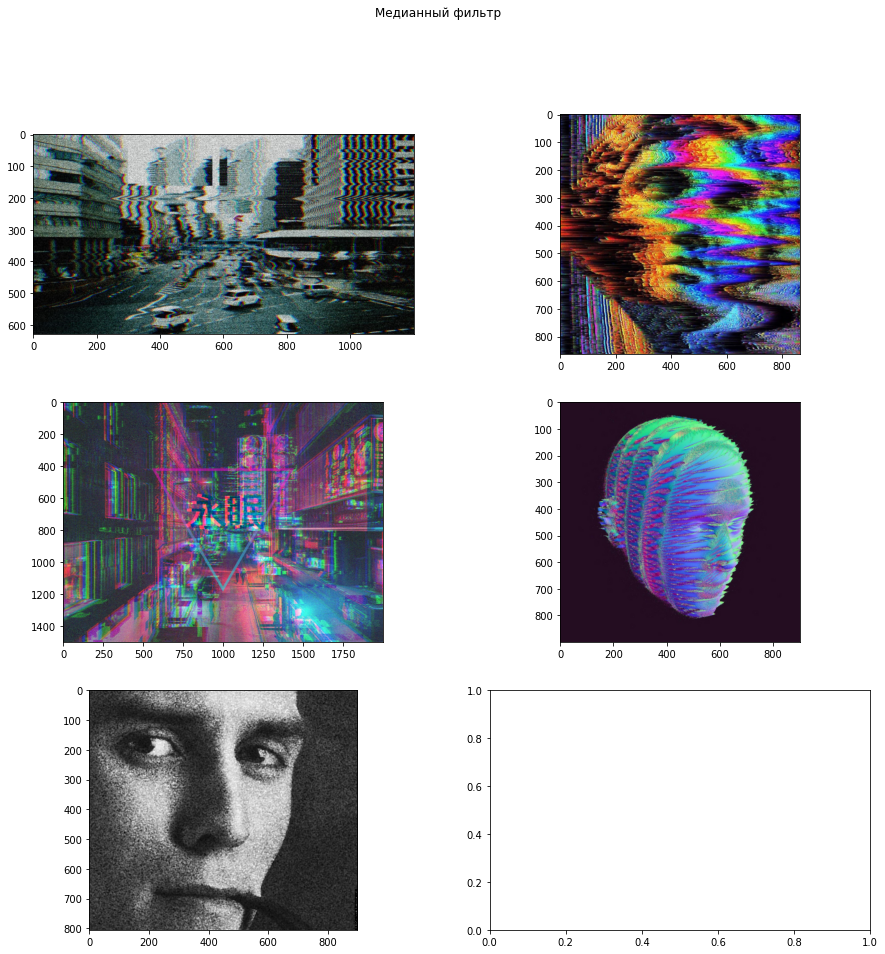

In [ ]:
# применяем медианный фильтр 3 × 3 к изображениям
images_rst = []
for i in range(len(images)):
  images_rst.append(cv2.medianBlur(images[i], 3))

# выводим изображения
fig, axs = plt.subplots(nrows= 3 , ncols= 2 , figsize=(15, 15))

fig.suptitle('Медианный фильтр')

axs[0, 0].imshow(cv2.cvtColor(images_rst[0],cv2.COLOR_BGR2RGB))
axs[0, 1].imshow(cv2.cvtColor(images_rst[1],cv2.COLOR_BGR2RGB))
axs[1, 0].imshow(cv2.cvtColor(images_rst[2],cv2.COLOR_BGR2RGB))
axs[1, 1].imshow(cv2.cvtColor(images_rst[3],cv2.COLOR_BGR2RGB))
axs[2, 0].imshow(cv2.cvtColor(images_rst[4],cv2.COLOR_BGR2RGB))

# Сохраняем изображение в папку с проектом
cv2.imwrite('image1_1.png', images_rst[0])
cv2.imwrite('image2_1.png', images_rst[1])
cv2.imwrite('image3_1.png', images_rst[2])
cv2.imwrite('image4_1.png', images_rst[3])
cv2.imwrite('image5_1.png', images_rst[4])

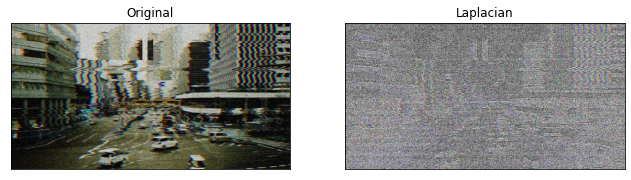

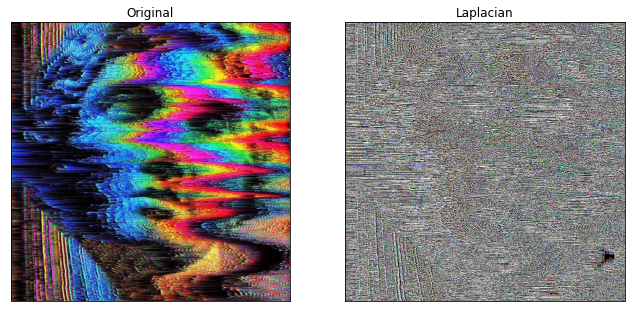

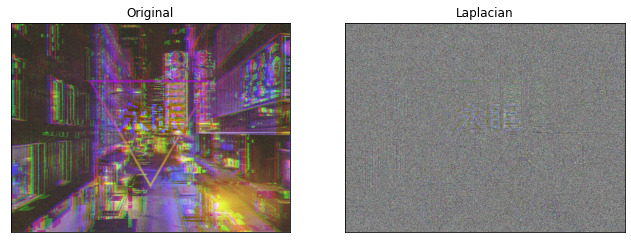

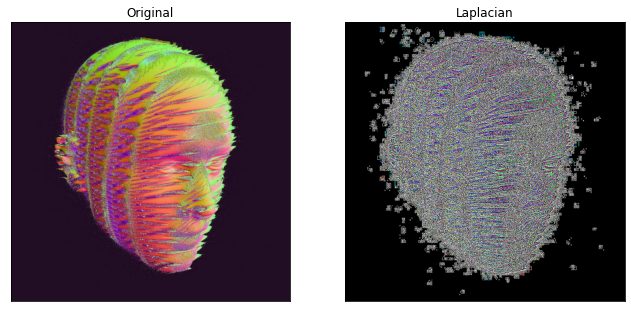

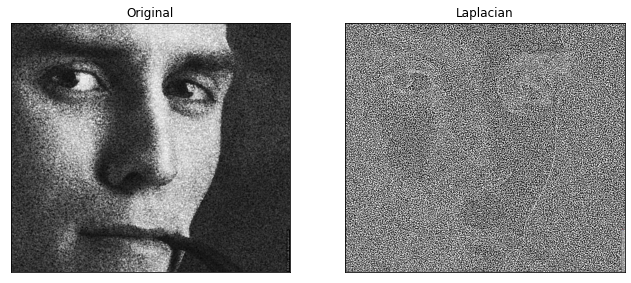

In [ ]:
#применяю фильтр лапласа к изображениям
for i in range(len(images)):
  new_image = cv2.Laplacian(images[i],cv2.CV_64F)
  plt.figure(figsize=(11,6))
  plt.subplot(121), plt.imshow(images[i]),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
  plt.xticks([]), plt.yticks([])
  plt.show()

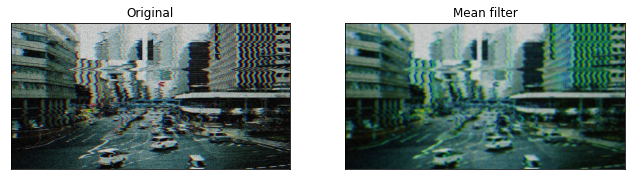

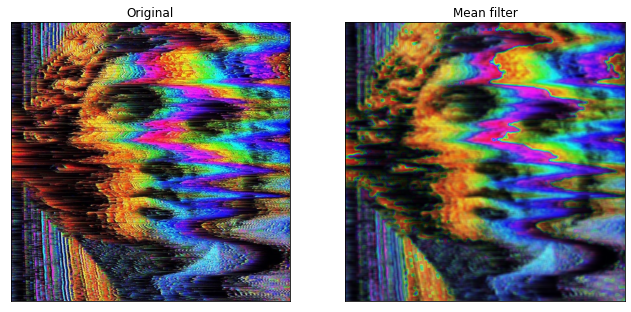

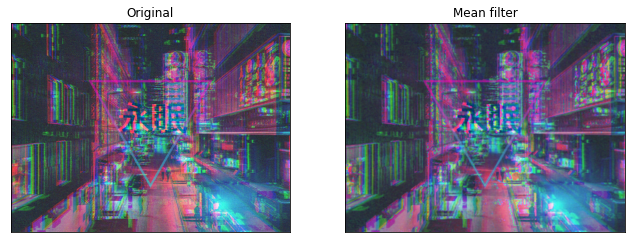

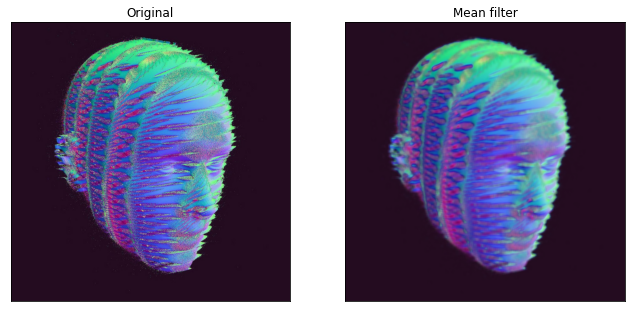

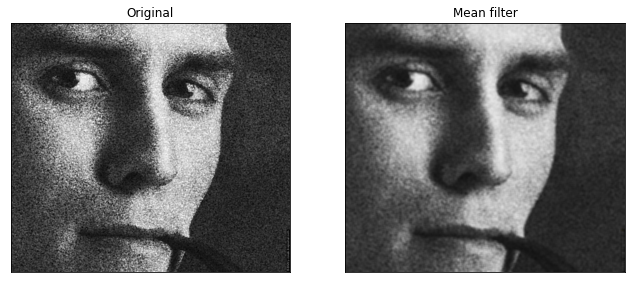

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
# Применяем фильтр средних часот 3x3 к изображениям
for i in range(len(images)):
  image = cv2.cvtColor(images[i], cv2.COLOR_BGR2HSV) # convert to HSV
  figure_size = 9 # the dimension of the x and y axis of the kernal.
  new_image = cv2.blur(image,(figure_size, figure_size))
  plt.figure(figsize=(11,6))
  plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
  plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
src = cv2.GaussianBlur(images[0], (3, 3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

scale = 1
delta = 0
ddepth = cv2.CV_16S

grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)    
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow(cv2.cvtColor(grad))

error: ignored